In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Alle Daten werden eingelesen die dieselbe Formatierung haben nach der vereinheitlichung durch die Umschreibung der csv files (GMT +1) gleich,
#Zeitangeben werden nur als Stunden angegeben, es gibt keine Minuten oder Sekunden angaben in files

files = [ 
"Air_temperature2015.csv",
"Air_temperature2016.csv",
"Air_temperature2017.csv",
"Air_temperature2018.csv",
"Air_temperature2019.csv",
"Air_temperature2020.csv",
"Air_temperature2021.csv",
"Air_temperature2022.csv",
"Diffuse_solar_radiation2015.csv",
"Diffuse_solar_radiation2016.csv",
"Diffuse_solar_radiation2017.csv",
"Diffuse_solar_radiation2018.csv",
"Diffuse_solar_radiation2019.csv",
"Diffuse_solar_radiation2020.csv",
"Diffuse_solar_radiation2021.csv",
"Diffuse_solar_radiation2022.csv",
"Relative_humidity2015.csv",
"Relative_humidity2016.csv",
"Relative_humidity2017.csv",
"Relative_humidity2018.csv",
"Relative_humidity2019.csv",
"Relative_humidity2020.csv",
"Relative_humidity2021.csv",
"Relative_humidity2022.csv",
"global_solar_radiation2015.csv",
"global_solar_radiation2016.csv",
"global_solar_radiation2017.csv",
"global_solar_radiation2018.csv",
"global_solar_radiation2019.csv",
"global_solar_radiation2020.csv",
"global_solar_radiation2021.csv",
"global_solar_radiation2022.csv"
]

#files elect hingegen hat Minuten angaben was dazu führt das leere rows entsthen, mit NaN values , um dagegen zu wirken habe ich die Zeit auf Stunden gerundet
#und die einzelnen values wie humidity , solar_radiation nach dem Datum sortiert
files_select = [     "electricity_generation_in_Germany_in_2015.csv",
    "electricity_generation_in_Germany_in_2016.csv",
    "electricity_generation_in_Germany_in_2017.csv",
    "electricity_generation_in_Germany_in_2018.csv",
    "electricity_generation_in_Germany_in_2019.csv",
    "electricity_generation_in_Germany_in_2020.csv",
    "electricity_generation_in_Germany_in_2021.csv",
    "electricity_generation_in_Germany_in_2022.csv"    ]



import pandas as pd



# Definiert eine Funktion, um eine Liste von csv Dateien für eine einzelne Variable zu verarbeiten
def datenRahmenVerarbeiten(files, variable_name):
  
    datenRahmen_var = pd.DataFrame()
    
   
    for file in files:
        # Liest die aktuelle CSV-Datei in einen DataFrame.
        datenRahmen = pd.read_csv(file)
        # Konvertieren der Spalte 'Date (GMT+1)' in ein einheitliches Zeitformat ,rundung auf die nächste Stunde.
        datenRahmen['Date (GMT+1)'] = pd.to_datetime(datenRahmen['Date (GMT+1)']).dt.round('H')
        # Gruppiert nach 'Date (GMT+1)', um Duplikate zu entfernen und  den Mittelwert der Werte zu erechnen. 
        # Der Durchschnitt dieser Messungen  wird mit mean() berechnet, um einen einzelnen Wert pro Stunde zu erhalten.
        datenRahmen = datenRahmen.groupby('Date (GMT+1)').mean()
        # Wenn mehrere Spalten vorhanden sind, wählt die zweite Spalte (angenommen, es ist die Datenspalte).
        if len(datenRahmen.columns) > 1:
            datenRahmen = datenRahmen.iloc[:, [1]]
        # Benennt die Spalte um in den gegebenen Variablennamen.
        datenRahmen.columns = [variable_name]
        # Verkettet den aktuellen DataFrame mit dem Variable DataFrame am Index.
        datenRahmen_var = pd.concat([datenRahmen_var, datenRahmen], axis=1)
    
    # Nach dem Zusammenführen aller Dateien berechnet den Mittelwert über die Spalten, um sie zu konkatenieren.
    datenRahmen_var = datenRahmen_var.mean(axis=1)
    # Gibt die zusammengefassten Daten für die Variable als DataFrame zurück.
    return datenRahmen_var.to_frame(name=variable_name)

# Verarbeitet die Daten jeder Variablen, indem die Dateinamen gefiltert und die Funktion aufgerufen wird.
temperature_df = datenRahmenVerarbeiten([f for f in files if "Air_temperature" in f], "Air_temperature")
diffuse_solar_radiation_df = datenRahmenVerarbeiten([f for f in files if "Diffuse_solar_radiation" in f], "Diffuse_solar_radiation")
global_solar_radiation_df = datenRahmenVerarbeiten([f for f in files if "global_solar_radiation" in f], "Global_solar_radiation")
humidity_df = datenRahmenVerarbeiten([f for f in files if "Relative_humidity" in f], "Relative_humidity")
electricity_df = datenRahmenVerarbeiten(files_select, "Electricity_generation")

# Kombiniert die verarbeiteten DataFrames für jede Variable zu einem einzigen vollständigen DataFrame.
complete_data = pd.concat([temperature_df, diffuse_solar_radiation_df, global_solar_radiation_df, humidity_df, electricity_df], axis=1)

# Zeigt den endgültigen kombinierten DataFrame mit allen Variablen an.
complete_data



,Air_temperature,Diffuse_solar_radiation,Global_solar_radiation,Relative_humidity,Electricity_generation
Date (GMT+1),,,,,
2014-12-31 23:00:00,NaN,NaN,NaN,NaN,0.0
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,0.0
2015-01-01 01:00:00,1.638710,0.0,0.0,89.290323,0.0
2015-01-01 02:00:00,1.577419,0.0,0.0,89.580645,0.0
2015-01-01 03:00:00,1.519355,0.0,0.0,89.741935,0.0
...,...,...,...,...,...
2022-12-31 18:00:00,NaN,NaN,NaN,NaN,0.0
2022-12-31 19:00:00,NaN,NaN,NaN,NaN,0.0
2022-12-31 20:00:00,NaN,NaN,NaN,NaN,0.0


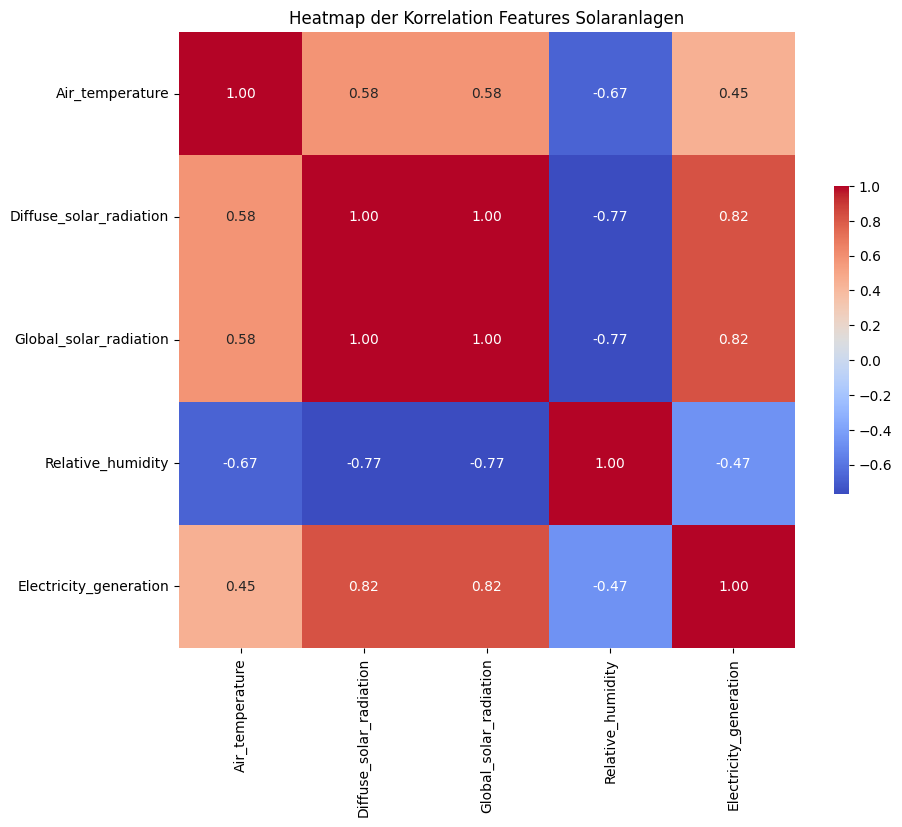

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Berechnung der Korrelationsmatrix
corrMatrix = complete_data.corr()

# Verwenden von Seaborn, um eine Heatmap der Korrelationsmatrix zu erstellen
plt.figure(figsize=(10, 8))  
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})


plt.title('Heatmap der Korrelation Features Solaranlagen')  

# Anzeige des Plots
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_20792\2836792394.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = violinPlot.set_xticklabels(complete_data.keys(), rotation=90)


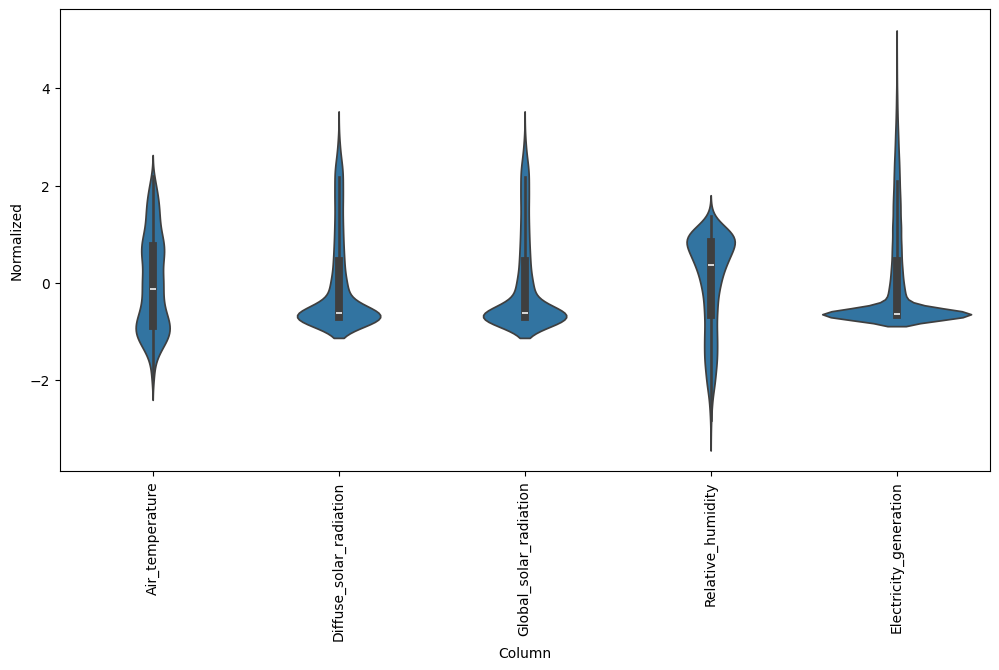

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bestimmung der Länge des kompletten Datensatzes
datenSatzLange = len(complete_data)

# Aufteilung des Datensatzes in Training, Validierung und Test
# 70% der Daten für das Training, 20% für die Validierung, 10% für den Test
datenSatzTraining = complete_data[0:int(datenSatzLange*0.7)]
datenSatzValidieren = complete_data[int(datenSatzLange*0.7):int(datenSatzLange*0.9)]
datenSatzTest = complete_data[int(datenSatzLange*0.9):]

# Berechnung des Mittelwerts und der Standardabweichung des Trainingsdatensatzes
trainingDatenSatzMittelwert = datenSatzTraining.mean()
trainingDatenSatzAbweichung = datenSatzTraining.std()

# Anzahl der Features (Spalten) im Datensatz
FeatureAnzahl = complete_data.shape[1]

# Normalisierung der Trainings- Validierungs- und Testdaten
# Durch Subtraktion des Mittelwerts und Division durch die Standardabweichung
datenSatzTraining = (datenSatzTraining - trainingDatenSatzMittelwert) / trainingDatenSatzAbweichung
datenSatzValidieren = (datenSatzValidieren - trainingDatenSatzMittelwert) / trainingDatenSatzAbweichung
datenSatzTest = (datenSatzTest - trainingDatenSatzMittelwert) / trainingDatenSatzAbweichung

# Normalisierung des gesamten Datensatzes für die Visualisierung
datenSatzNormalisieren = (complete_data - trainingDatenSatzMittelwert) / trainingDatenSatzAbweichung

datenSatzNormalisieren = datenSatzNormalisieren.melt(var_name='Column', value_name='Normalized')

# Erstellung einer Violinplot-Visualisierung
plt.figure(figsize=(12, 6))
violinPlot = sns.violinplot(x='Column', y='Normalized', data=datenSatzNormalisieren)
_ = violinPlot.set_xticklabels(complete_data.keys(), rotation=90)


In [5]:
complete_data.describe().transpose() # Überprüfung ob Korrektur vorgenommen werden muss an den Values in den Columns , die Daten scheinen 
# keine besonderen Auffäligkeiten , jedoch ist Diffuse- und Global_solar_radiation eins eins die selbe csv file.

,count,mean,std,min,25%,50%,75%,max
Air_temperature,2304.0,9.906558,6.857971,-3.703571,3.968629,9.154839,15.283817,25.351613
Diffuse_solar_radiation,2304.0,132.682070,189.449889,0.000000,0.000000,16.919355,220.919828,729.733333
Global_solar_radiation,2304.0,132.682070,189.449889,0.000000,0.000000,16.919355,220.919828,729.733333
Relative_humidity,2304.0,77.250656,12.613567,38.900000,68.633871,81.741667,87.618011,94.387097
Electricity_generation,70112.0,5083.744909,7891.549869,0.000000,0.000000,151.750000,7993.437500,40881.900000


In [6]:
#Das Duplikat wird entfernt aus dem Dataframe

if 'Global_solar_radiation' in complete_data.columns:
    complete_data = complete_data.drop('Global_solar_radiation', axis=1)
else:
    print("Column does not exist in DataFrame")



complete_data.describe().transpose()




,count,mean,std,min,25%,50%,75%,max
Air_temperature,2304.0,9.906558,6.857971,-3.703571,3.968629,9.154839,15.283817,25.351613
Diffuse_solar_radiation,2304.0,132.682070,189.449889,0.000000,0.000000,16.919355,220.919828,729.733333
Relative_humidity,2304.0,77.250656,12.613567,38.900000,68.633871,81.741667,87.618011,94.387097
Electricity_generation,70112.0,5083.744909,7891.549869,0.000000,0.000000,151.750000,7993.437500,40881.900000


In [7]:

import numpy as np
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               datenSatzTraining=datenSatzTraining, datenSatzValidieren=datenSatzValidieren, datenSatzTest=datenSatzTest,
               label_columns=None):
    # Klasse zur Fenster Erstellung
    self.datenSatzTraining = datenSatzTraining
    self.datenSatzValidieren = datenSatzValidieren
    self.datenSatzTest = datenSatzTest

    # Speichern der Rohdaten als Trainings-, Validierungs- und Testdatensätze
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.SpaltenIndizes = {name: i for i, name in
                           enumerate(datenSatzTraining.columns)}

    # Fensterparameter festlegen
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    # Gesamtgröße des Datenfensters
    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\datenSatzLange'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

# Zuweisung der Parameter für hauptFenster
hauptFenster = WindowGenerator(
    input_width=24,
    label_width=1,
    shift=24,
    datenSatzTraining=datenSatzTraining,
    datenSatzValidieren=datenSatzValidieren,
    datenSatzTest=datenSatzTest,
    label_columns=['Electricity_generation']
)

# Aufteilen des Fensters in Input und Lables
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  # Falls Label-Spalten spezifizierbar sind, werden entsprechende Labels ausgewählt
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.SpaltenIndizes[name]] for name in self.label_columns],
        axis=-1)

  # Slicing kann die statischen Formen verändernt, deshalb manuell festlegen
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window
import tensorflow as tf

# Erstellen eines Beispielfensters und teilen in Eingabe und Labels
example_window = tf.stack([np.array(datenSatzTraining[:hauptFenster.total_window_size]),
                           np.array(datenSatzTraining[100:100+hauptFenster.total_window_size]),
                           np.array(datenSatzTraining[200:200+hauptFenster.total_window_size])])

inputsBeispiel, labelsBeispiel = hauptFenster.split_window(example_window)

# Ausgabe der Formen von Fenster, Eingabe und Labels
print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {inputsBeispiel.shape}')
print(f'Labels shape: {labelsBeispiel.shape}')




All shapes are: (batch, time, features)
Window shape: (3, 48, 5)
Inputs shape: (3, 24, 5)
Labels shape: (3, 1, 1)


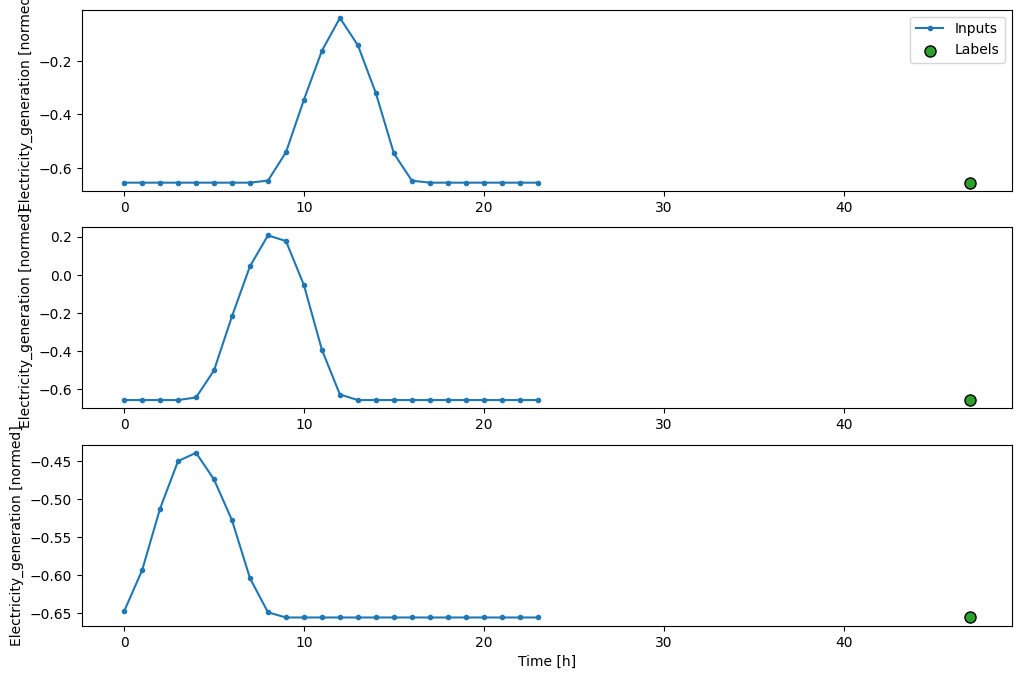

In [8]:
# Beispiel Angaben zu hauptFenster hinzufügen
hauptFenster.example = inputsBeispiel, labelsBeispiel

# Plot Funktion für die Visualisierung der Daten
def plot(self, model=None, plot_col='Electricity_generation', max_subplots=3):
  inputs, labels = self.example
  # Graph Größe festlegen
  plt.figure(figsize=(12, 8))
  # Spaltenindex für die Plot-Größe bestimmen
  spaltenIndex = self.SpaltenIndizes[plot_col]
  # Subplot Anzahl festlegen
  unterdarstellungMax = min(max_subplots, len(inputs))
  for datenSatzLange in range(unterdarstellungMax):
    plt.subplot(unterdarstellungMax, 1, datenSatzLange+1)
    # Beschriftung y-Achsenskalierung
    plt.ylabel(f'{plot_col} [normed]')
    # Plotten der Eingabe
    plt.plot(self.input_indices, inputs[datenSatzLange, :, spaltenIndex],
             label='Inputs', marker='.', zorder=-10)
    # Spaltenindex für Labels bestimmen
    if self.label_columns:
      labelSpaltenIndex = self.label_columns_indices.get(plot_col, None)
    else:
      labelSpaltenIndex = spaltenIndex

    if labelSpaltenIndex is None:
      continue
    # Plotten der Labels
    plt.scatter(self.label_indices, labels[datenSatzLange, :, labelSpaltenIndex],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    # Prediction plotten, wenn Modell vorhanden ist
    if model is not None:
      prognose = model(inputs)
      plt.scatter(self.label_indices, prognose[datenSatzLange, :, labelSpaltenIndex],
                  marker='X', edgecolors='k', label='prognose',
                  c='#ff7f0e', s=64)
    # Legende nur beim ersten Subplot anzeigen
    if datenSatzLange == 0:
      plt.legend()
  # Beschriftung x-Achse
  plt.xlabel('Time [h]')

# Ausgabe der Plot Funktion
WindowGenerator.plot = plot

hauptFenster.plot()

In [9]:
# Erstellen des TensorFlow-Datensätzen und Umwandeln der Daten in ein Numpy-Array
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  # Erstellen eines Zeitreihen-Datasets mit TensorFlow-Utilities
  datenSet = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  datenSet = datenSet.map(self.split_window)

  return datenSet

WindowGenerator.make_dataset = make_dataset

# Jeweils Erstellen und Rückgabe der Datasets für Training, Validierung und Test
@property
def train(self):
  return self.make_dataset(self.datenSatzTraining)

@property
def val(self):
  return self.make_dataset(self.datenSatzValidieren)

@property
def test(self):
  return self.make_dataset(self.datenSatzTest)

@property
def example(self):
  # Erstellen und Cachen oder Abrufen des Beispielsatzes
  result = getattr(self, '_example', None)
  if result is None:
    # Wenn kein Beispielbatch gefunden wird, '.train' dataset nutzen
    result = next(iter(self.train))
    # und Cachen
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

hauptFenster.train.element_spec

(TensorSpec(shape=(None, 24, 5), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))




439/439 [==============================] - 1s 1ms/step - loss: 0.1077 - mean_absolute_error: 0.1883


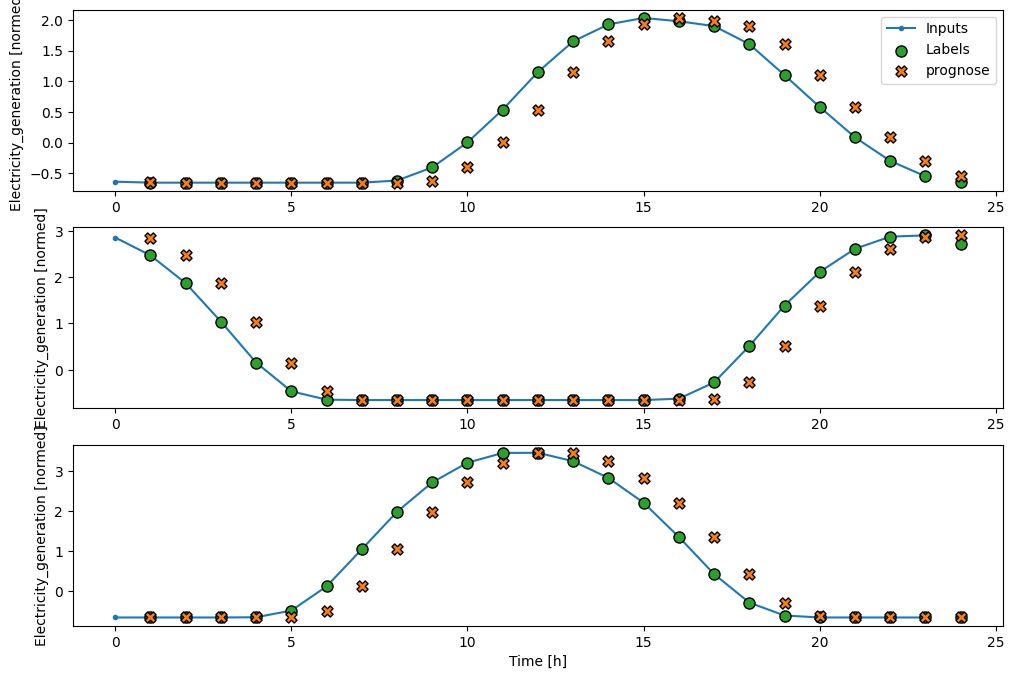

In [10]:
# Fenster für die einzelnen Steps
unterFenster = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Electricity_generation'])
unterFenster

# Erstellen Baseline-Modell
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

# Erstellen und Kompilieren des Baseline-Modells
SpaltenIndizes = {name: i for i, name in enumerate(datenSatzTraining.columns)}
baseline = Baseline(label_index=SpaltenIndizes['Electricity_generation'])

# Kompilieren des Modells
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

# Evaluieren der Test- und Validierungsdaten und speichern der Ergebnisse
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(unterFenster.val)
performance['Baseline'] = baseline.evaluate(unterFenster.test, verbose=0)

# Fenster für mehrere Schritte
Fenster = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Electricity_generation'])

# Ausgabe des Fensters
Fenster
Fenster.plot(baseline)

In [11]:
# Fehlende Werte mit Mittelwerten der Spalten füllen
for datenRahmen in [datenSatzTraining, datenSatzValidieren, datenSatzTest]:
    datenRahmen.fillna(datenRahmen.mean(), inplace=True)

In [12]:
# sequentielles Modell mit Dense-Layer
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])


print('Input Form:', unterFenster.example[0].shape)
print('Output Form:', linear(unterFenster.example[0]).shape)

Input Form: (32, 1, 5)
Output Form: (32, 1, 1)


Epoch 1/10
1534/1534 [==============================] - 2s 1ms/step - loss: 0.2892 - mean_absolute_error: 0.3885 - val_loss: 0.1181 - val_mean_absolute_error: 0.2618
Epoch 2/10
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0864 - mean_absolute_error: 0.1924 - val_loss: 0.1063 - val_mean_absolute_error: 0.2186
Epoch 3/10
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0837 - mean_absolute_error: 0.1851 - val_loss: 0.1047 - val_mean_absolute_error: 0.2053
Epoch 4/10
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0835 - mean_absolute_error: 0.1847 - val_loss: 0.1046 - val_mean_absolute_error: 0.2039
Epoch 5/10
1534/1534 [==============================] - 2s 1ms/step - loss: 0.0835 - mean_absolute_error: 0.1847 - val_loss: 0.1046 - val_mean_absolute_error: 0.2041
Epoch 6/10
439/439 [==============================] - 0s 816us/step - loss: 0.1046 - mean_absolute_error: 0.2039


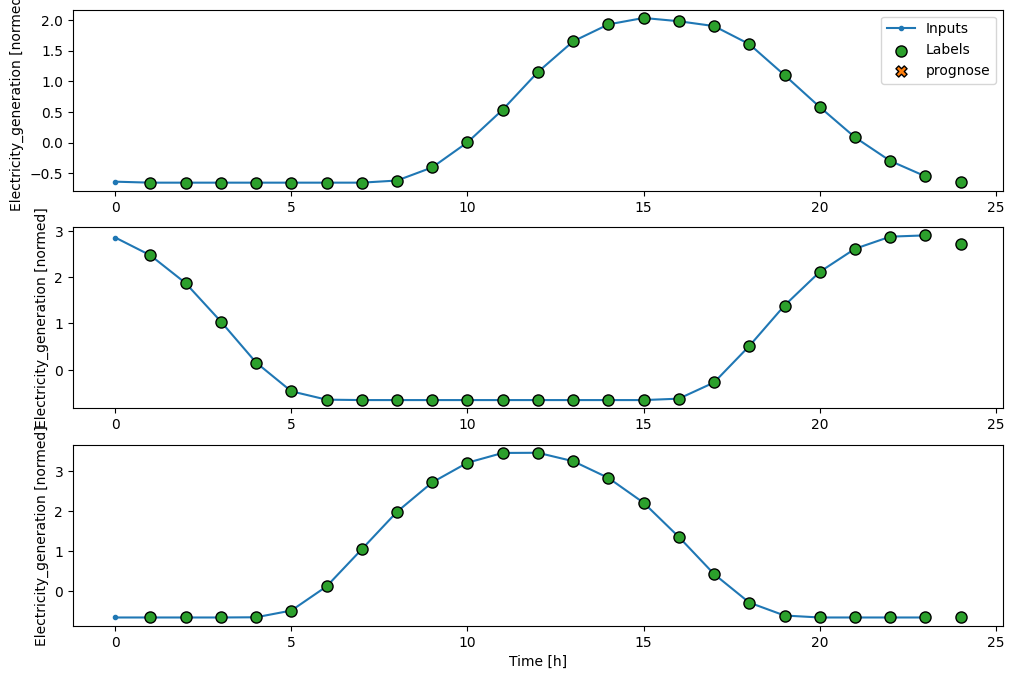

In [13]:
# Anzahl der Epochen
MAX_EPOCHS = 10

# Kompilieren und Trainieren eines Modells 
# Früher stoppen wenn die Validierungsverluste stagnieren
def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
# Training des Modells auf dem Trainingsdatensatz mit festgelegter Anzahl von Epochen
# Wird gestoppt wenn Validierungsverluste stagnieren
  verlauf = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return verlauf
# Anwendung auf das lineare Modell und single-step-window
verlauf = compile_and_fit(linear, unterFenster)
# Evaluieren der Test- und Validierungsdaten und speichern der Ergebnisse
val_performance['Linear'] = linear.evaluate(unterFenster.val)
performance['Linear'] = linear.evaluate(unterFenster.test, verbose=0)

# Ausgabe
Fenster.plot(linear)

Epoch 1/10
1533/1533 [==============================] - 11s 6ms/step - loss: 0.0585 - mean_absolute_error: 0.1205 - val_loss: 0.0117 - val_mean_absolute_error: 0.0592
Epoch 2/10
1533/1533 [==============================] - 9s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0481 - val_loss: 0.0099 - val_mean_absolute_error: 0.0524
Epoch 3/10
1533/1533 [==============================] - 9s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0445 - val_loss: 0.0094 - val_mean_absolute_error: 0.0482
Epoch 4/10
1533/1533 [==============================] - 9s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0426 - val_loss: 0.0087 - val_mean_absolute_error: 0.0477
Epoch 5/10
1533/1533 [==============================] - 9s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0415 - val_loss: 0.0086 - val_mean_absolute_error: 0.0465
Epoch 6/10
1533/1533 [==============================] - 9s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0404 - val_loss: 0.0085 - val_mean_absolute_error: 0.0447
Epo

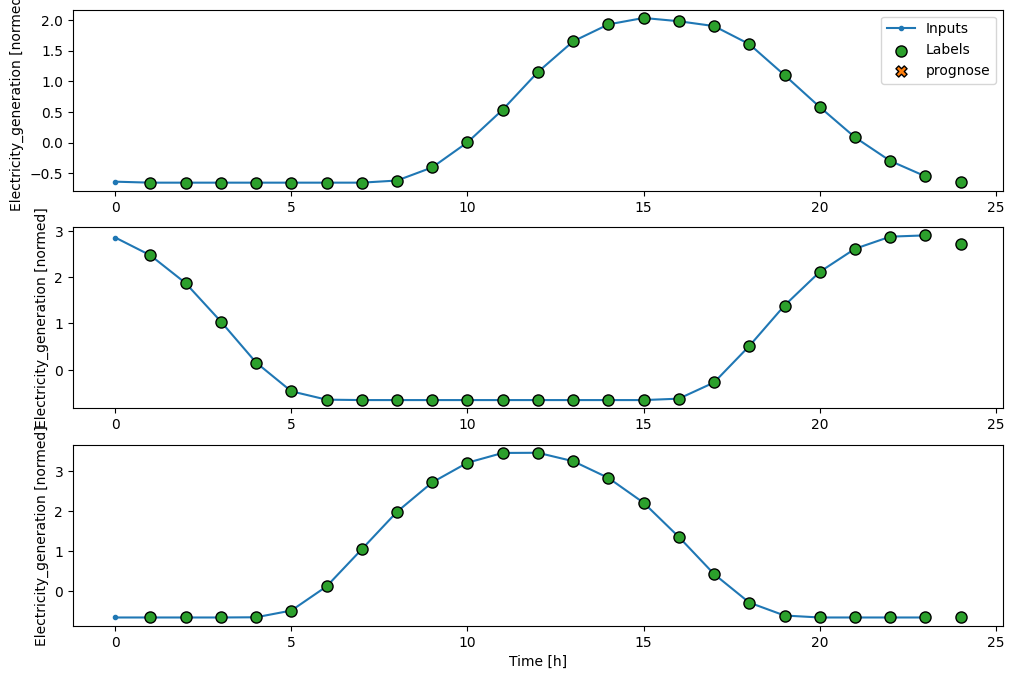

In [14]:

# Sequentielles Modell mit LSTM-Schicht und Dense-Layer
from IPython import display

rnn = tf.keras.models.Sequential([
    # LSTM-Schicht mit 32-Einheiten
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Dense-Layer mit Ausgabegröße 1
    tf.keras.layers.Dense(units=1)
])
# Kompilierung und Training von LSTM auf wide_window
verlauf = compile_and_fit(rnn, Fenster)

inputsBeispiel, labelsBeispiel = unterFenster.example
prognoseBeispiel = linear.predict(inputsBeispiel)

# Evaluieren der Test- und Validierungsdaten und speichern der Ergebnisse
# Außerdem Bewertung der Leistung
val_performance['LSTM'] = rnn.evaluate(Fenster.val)
performance['LSTM'] = rnn.evaluate(Fenster.test, verbose=0)

# Plot für wide_window
Fenster.plot(rnn)


